In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import DataStructs
%matplotlib inline

In [2]:
#Import packages

#Rdkit
from rdkit import Chem

#Pandas
import pandas as pd
from pandas import DataFrame

#Others
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import joblib
import random
import numpy as np
import os
import math
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:\\Users\\A\\Desktop\\Bioactive\\IL-1β")

In [56]:
#load data
data = pd.read_csv('./Original_data.csv',sep=',',index_col=0)
data=data.dropna(axis=0,how='all')
date=data
data

,IsomericSMILES,Activity,Canonical_smiles
cid,,,
53300413.0,CCOC1=CC=C(C=C1)CCN2[C@H](CN(C(=O)C2=O)[C@@H](...,1,CCOc1ccc(CCN2C(=O)C(=O)N([C@@H](CC(C)C)CN3CCC[...
3247106.0,COC1=CC=C(C=C1)C[C@@]2([C@@H]3[C@@H](CC4=C3C=C...,1,COC(=O)[C@@]1(Cc2ccc(OC)cc2)[C@H]2c3cc(C(=O)N4...
51360471.0,CCCCN1C(=NN=N1)C(C2=CC=CC3=CC=CC=C32)N4CCN(CC4...,1,CCCCn1nnnc1C(c1cccc2ccccc12)N1CCN(C/C=C/c2cccc...
1479279.0,CC1=CC=C(C=C1)CN2C=CC(=O)C(=C2C)OCC3=C(C=CC=C3...,1,Cc1ccc(Cn2ccc(=O)c(OCc3c(Cl)cccc3Cl)c2C)cc1
49795501.0,CC1=C(C=C(C=C1)F)C(=O)N2CCCCC2C3=CC(=NO3)C(=O)...,1,Cc1ccc(F)cc1C(=O)N1CCCCC1c1cc(C(=O)NC(C)C)no1
...,...,...,...
53301550.0,C[C@@H](C1=CC=CC=C1)N2C[C@@H](OC3=C(S2(=O)=O)C...,0,C[C@@H](c1ccccc1)N1C[C@H](COCc2ccccc2)Oc2cc(N3...
53301551.0,C[C@@H](C1=CC=CC=C1)N2C[C@H](OC3=C(S2(=O)=O)C=...,0,C[C@@H](c1ccccc1)N1C[C@@H](COCc2ccccc2)Oc2cc(N...
53301552.0,CCCCC[C@@H](C)N1C[C@@H](OC2=C(S1(=O)=O)C=CC(=C...,0,CCCCC[C@@H](C)N1C[C@H](COCc2ccccc2)Oc2cc(N3CC[...


In [5]:
import numpy as np
import urllib.request
import pandas as pd
from rdkit import rdBase, Chem, DataStructs 
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import AllChem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem import Draw

,IsomericSMILES,Activity,Canonical_smiles,Molecule
cid,,,,
53300413.0,CCOC1=CC=C(C=C1)CCN2[C@H](CN(C(=O)C2=O)[C@@H](...,1,CCOc1ccc(CCN2C(=O)C(=O)N([C@@H](CC(C)C)CN3CCC[...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3247106.0,COC1=CC=C(C=C1)C[C@@]2([C@@H]3[C@@H](CC4=C3C=C...,1,COC(=O)[C@@]1(Cc2ccc(OC)cc2)[C@H]2c3cc(C(=O)N4...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
51360471.0,CCCCN1C(=NN=N1)C(C2=CC=CC3=CC=CC=C32)N4CCN(CC4...,1,CCCCn1nnnc1C(c1cccc2ccccc12)N1CCN(C/C=C/c2cccc...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1479279.0,CC1=CC=C(C=C1)CN2C=CC(=O)C(=C2C)OCC3=C(C=CC=C3...,1,Cc1ccc(Cn2ccc(=O)c(OCc3c(Cl)cccc3Cl)c2C)cc1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
49795501.0,CC1=C(C=C(C=C1)F)C(=O)N2CCCCC2C3=CC(=NO3)C(=O)...,1,Cc1ccc(F)cc1C(=O)N1CCCCC1c1cc(C(=O)NC(C)C)no1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
...,...,...,...,...
53301550.0,C[C@@H](C1=CC=CC=C1)N2C[C@@H](OC3=C(S2(=O)=O)C...,0,C[C@@H](c1ccccc1)N1C[C@H](COCc2ccccc2)Oc2cc(N3...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
53301551.0,C[C@@H](C1=CC=CC=C1)N2C[C@H](OC3=C(S2(=O)=O)C=...,0,C[C@@H](c1ccccc1)N1C[C@@H](COCc2ccccc2)Oc2cc(N...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
53301552.0,CCCCC[C@@H](C)N1C[C@@H](OC2=C(S1(=O)=O)C=CC(=C...,0,CCCCC[C@@H](C)N1C[C@H](COCc2ccccc2)Oc2cc(N3CC[...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

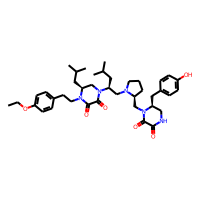
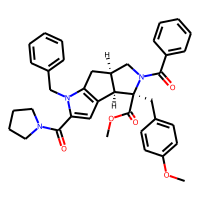
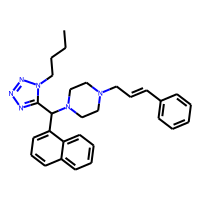
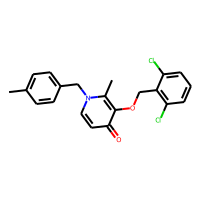
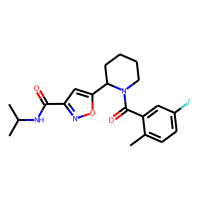
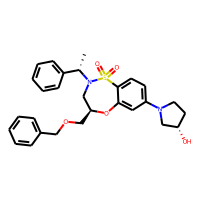
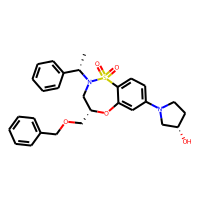
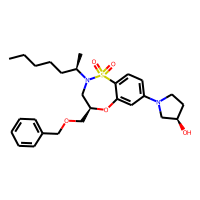
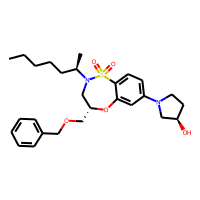
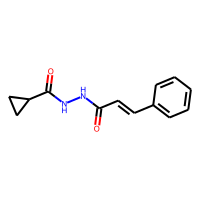

In [7]:
PandasTools.AddMoleculeColumnToFrame(data,'Canonical_smiles','Molecule')
data

In [8]:
fps = []
for mol in data.Molecule:
        fp = [i for i in Chem.MACCSkeys.GenMACCSKeys(mol)]
        fps.append(fp)
fp_MACCSkeys = pd.DataFrame(fps)


In [9]:
fp_MACCSkeys

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38872,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
38873,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
38874,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
38875,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [11]:
nuclear= pd.read_csv('./nuclear.csv',index_col=0)
nuclear

,SMILES
Name,
A,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...
U,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...
C,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...
G,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...
T,O[C@H]1C[C@H](N(C(N2)=O)C=C(C)C2=O)O[C@@H]1CO


In [12]:
Chemdraw_smiles=nuclear['SMILES']

In [13]:
Chemdraw_smiles

Name
A    OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...
U    O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...
C    O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...
G    O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...
T        O[C@H]1C[C@H](N(C(N2)=O)C=C(C)C2=O)O[C@@H]1CO
Name: SMILES, dtype: object

In [14]:
Smis=[]
for i in Chemdraw_smiles:
    Smis.append(i)
Mols = []
for Smi in Smis:
    Mol = Chem.MolFromSmiles(Smi)
    Mols.append(Mol)
Canonical_smis = []
for Mol in Mols:
    Canonical_smi = Chem.MolToSmiles(Mol)
    Canonical_smis.append(Canonical_smi)
nuclear['Canonical_smiles']=Canonical_smis
nuclear

,SMILES,Canonical_smiles
Name,,
A,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
U,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...
C,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1
G,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...
T,O[C@H]1C[C@H](N(C(N2)=O)C=C(C)C2=O)O[C@@H]1CO,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O


,SMILES,Canonical_smiles,Molecule
Name,,,
A,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
U,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
C,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
G,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
T,O[C@H]1C[C@H](N(C(N2)=O)C=C(C)C2=O)O[C@@H]1CO,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

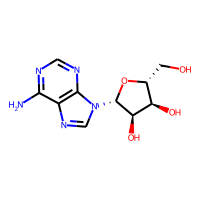
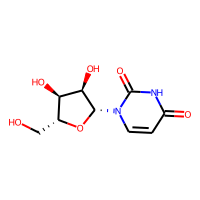
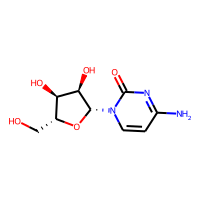
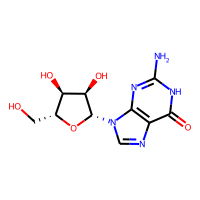
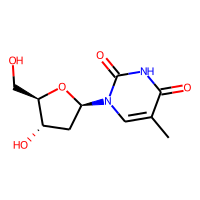

In [15]:
PandasTools.AddMoleculeColumnToFrame(nuclear,'Canonical_smiles','Molecule')
nuclear

In [16]:
fps_nu = []
for mol in nuclear.Molecule:
        fp = [i for i in Chem.MACCSkeys.GenMACCSKeys(mol)]
        fps_nu.append(fp)
fp_MACCSkeys_nu = pd.DataFrame(fps_nu)
fp_MACCSkeys_nu.index=nuclear.index
dat_nu=np.array(fp_MACCSkeys_nu)

In [17]:
A=dat_nu[0]
A

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [18]:
def getSimilarity(s,t):
    s=np.asarray(s)
    t=np.asarray(t)
    if (s.shape!=t.shape):
        print("Wrong")
        return -1
    a=np.sum(s==1)
    b=np.sum(t==1)
    c=0
    for i in range(len(s)):
        if (s[i]==1 and t[i]==1): c+=1
    return c/(a+b-c)

In [19]:
dat=np.array(fp_MACCSkeys)

dat

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [20]:
A=dat_nu[0]
U=dat_nu[1]
C=dat_nu[2]
G=dat_nu[3]
T=dat_nu[4]
DATAS=[]
for s in range(0, len(dat)):
   DATA=[getSimilarity(dat[s],A),getSimilarity(dat[s],U),getSimilarity(dat[s],C),getSimilarity(dat[s],G),getSimilarity(dat[s],T)]
   DATAS.append(DATA)


In [21]:
aa=pd.DataFrame(DATAS)
aa.index=data.index
aa.columns=['A','U','C','G','T']
aa['Max']=aa.max(axis = 1)
aa['Activity']=data['Activity']
aa['Canonical_smiles']=data['Canonical_smiles']
aa

,A,U,C,G,T,Max,Activity,Canonical_smiles
cid,,,,,,,,
53300413.0,0.538462,0.565789,0.531646,0.543210,0.605263,0.605263,1,CCOc1ccc(CCN2C(=O)C(=O)N([C@@H](CC(C)C)CN3CCC[...
3247106.0,0.455696,0.461538,0.432099,0.463415,0.500000,0.500000,1,COC(=O)[C@@]1(Cc2ccc(OC)cc2)[C@H]2c3cc(C(=O)N4...
51360471.0,0.358974,0.296296,0.304878,0.337349,0.350000,0.358974,1,CCCCn1nnnc1C(c1cccc2ccccc12)N1CCN(C/C=C/c2cccc...
1479279.0,0.383562,0.428571,0.416667,0.394737,0.410959,0.428571,1,Cc1ccc(Cn2ccc(=O)c(OCc3c(Cl)cccc3Cl)c2C)cc1
49795501.0,0.450000,0.474359,0.444444,0.440476,0.512821,0.512821,1,Cc1ccc(F)cc1C(=O)N1CCCCC1c1cc(C(=O)NC(C)C)no1
...,...,...,...,...,...,...,...,...
53301550.0,0.468085,0.473118,0.463158,0.474227,0.521739,0.521739,0,C[C@@H](c1ccccc1)N1C[C@H](COCc2ccccc2)Oc2cc(N3...
53301551.0,0.468085,0.473118,0.463158,0.474227,0.521739,0.521739,0,C[C@@H](c1ccccc1)N1C[C@@H](COCc2ccccc2)Oc2cc(N...
53301552.0,0.448980,0.453608,0.444444,0.455446,0.500000,0.500000,0,CCCCC[C@@H](C)N1C[C@H](COCc2ccccc2)Oc2cc(N3CC[...


In [22]:
aa.to_csv("./Similary.csv",sep=",",header=1,index=1)

In [23]:
bb=aa[aa['Max'] > 0.5]

In [24]:
bb['Activity'].value_counts()

0    13173
1      567
Name: Activity, dtype: int64

In [25]:
bb

,A,U,C,G,T,Max,Activity,Canonical_smiles
cid,,,,,,,,
53300413.0,0.538462,0.565789,0.531646,0.543210,0.605263,0.605263,1,CCOc1ccc(CCN2C(=O)C(=O)N([C@@H](CC(C)C)CN3CCC[...
49795501.0,0.450000,0.474359,0.444444,0.440476,0.512821,0.512821,1,Cc1ccc(F)cc1C(=O)N1CCCCC1c1cc(C(=O)NC(C)C)no1
9551212.0,0.544304,0.551282,0.518519,0.548780,0.610390,0.610390,1,CC1CCN(CCCNC(=O)CCCNC(=O)Cn2cnc3sc4c(c3c2=O)CC...
53300217.0,0.440476,0.445783,0.418605,0.431818,0.518519,0.518519,1,CCOC(=O)[C@]12CCC=C1N(Cc1ccc(Cl)cc1Cl)C(=O)[C@...
1254489.0,0.493333,0.480000,0.467532,0.500000,0.520000,0.520000,1,O=C(Nc1ccc(N2CCN(C(=O)c3ccc(Cl)cc3)CC2)cc1)c1c...
...,...,...,...,...,...,...,...,...
53301547.0,0.486486,0.493151,0.480000,0.493506,0.513514,0.513514,0,COC(=O)c1ccc(N2C(c3ccsc3)=Cc3cc4c(cc3C2CC(=O)c...
53301548.0,0.468085,0.473118,0.463158,0.474227,0.521739,0.521739,0,C[C@H](c1ccccc1)N1C[C@H](COCc2ccccc2)Oc2cc(N3C...
53301549.0,0.468085,0.473118,0.463158,0.474227,0.521739,0.521739,0,C[C@H](c1ccccc1)N1C[C@@H](COCc2ccccc2)Oc2cc(N3...


In [26]:
from psmpy import PsmPy  
from psmpy.functions import cohenD  
from psmpy.plotting import *

In [36]:
fpdata=fp_MACCSkeys

In [37]:
fpdata=fpdata.add_prefix('column_')
fpdata.index=aa.index
fpdata

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_157,column_158,column_159,column_160,column_161,column_162,column_163,column_164,column_165,column_166
cid,,,,,,,,,,,,,,,,,,,,,
53300413.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3247106.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
51360471.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1479279.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
49795501.0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301550.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
53301551.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
53301552.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [39]:
cc=fpdata.loc[bb.index]
cc['CASE']=data['Activity']
cc['OPTUM_LAB_ID']=cc.index
cc

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_159,column_160,column_161,column_162,column_163,column_164,column_165,column_166,CASE,OPTUM_LAB_ID
cid,,,,,,,,,,,,,,,,,,,,,
53300413.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,53300413.0
49795501.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,49795501.0
9551212.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,9551212.0
53300217.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,53300217.0
1254489.0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,1,1254489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301547.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,53301547.0
53301548.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,53301548.0
53301549.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,53301549.0


In [40]:
cc.to_csv("./cc.csv",sep=",",header=1,index=1)

In [41]:
import psmatching.match as psm
import pytest

In [42]:
cc

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_159,column_160,column_161,column_162,column_163,column_164,column_165,column_166,CASE,OPTUM_LAB_ID
cid,,,,,,,,,,,,,,,,,,,,,
53300413.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,53300413.0
49795501.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,49795501.0
9551212.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,9551212.0
53300217.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,53300217.0
1254489.0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,1,1254489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301547.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,53301547.0
53301548.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,53301548.0
53301549.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,53301549.0


In [43]:
path = "cc.csv"

In [44]:
model = "CASE ~ column_1 + column_2 + column_3 + column_4 + column_5 + column_6 + column_7 + column_8 + column_9 + column_10 + column_11 + column_12 + column_13 + column_14 + column_15 + column_16 + column_17 + column_18 + column_19 + column_20 + column_21 + column_22 + column_23 + column_24 + column_25 + column_26 + column_27 + column_28 + column_29 + column_30 + column_31 + column_32 + column_33 + column_34 + column_35 + column_36 + column_37 + column_38 + column_39 + column_40 + column_41 + column_42 + column_43 + column_44 + column_45 + column_46 + column_47 + column_48 + column_49 + column_50 + column_51 + column_52 + column_53 + column_54 + column_55 + column_56 + column_57 + column_58 + column_59 + column_60 + column_61 + column_62 + column_63 + column_64 + column_65 + column_66 + column_67 + column_68 + column_69 + column_70 + column_71 + column_72 + column_73 + column_74 + column_75 + column_76 + column_77 + column_78 + column_79 + column_80 + column_81 + column_82 + column_83 + column_84 + column_85 + column_86 + column_87 + column_88 + column_89 + column_90 + column_91 + column_92 + column_93 + column_94 + column_95 + column_96 + column_97 + column_98 + column_99 + column_100 + column_101 + column_102 + column_103 + column_104 + column_105 + column_106 + column_107 + column_108 + column_109 + column_110 + column_111 + column_112 + column_113 + column_114 + column_115 + column_116 + column_117 + column_118 + column_119 + column_120 + column_121 + column_122 + column_123 + column_124 + column_125 + column_126 + column_127 + column_128 + column_129 + column_130 + column_131 + column_132 + column_133 + column_134 + column_135 + column_136 + column_137 + column_138 + column_139 + column_140 + column_141 + column_142 + column_143 + column_144 + column_145 + column_146 + column_147 + column_148 + column_149 + column_150 + column_151 + column_152 + column_153 + column_154 + column_155 + column_156 + column_157 + column_158 + column_159 + column_160 + column_161 + column_162 + column_163 + column_164 + column_165 + column_166"

In [45]:
k = "1"

In [46]:
m = psm.PSMatch(path, model, k)

In [47]:

m.prepare_data()




Calculating propensity scores ... DONE!
Preparing data ... DONE!


In [48]:
# Perform matching
m.match(caliper = None, replace = False)



Matching [1] controls to each case ...  DONE!
Writing matched data to file ... DONE!



In [49]:

# Evaluate matches via chi-square test
m.evaluate()

Evaluating matches ...
	column_1: PASSED
	column_2: PASSED
	column_3: PASSED
	column_4: PASSED
	column_5: PASSED
	column_6: PASSED
	column_7: PASSED
	column_8: PASSED
	column_9: PASSED
	column_10: PASSED
	column_11: PASSED
	column_12: PASSED
	column_13: PASSED
	column_14: PASSED
	column_15: PASSED
	column_16: PASSED
	column_17: PASSED
	column_18: PASSED
	column_19: PASSED
	column_20: PASSED
	column_21: PASSED
	column_22: PASSED
	column_23: FAILED
	column_24: PASSED
	column_25: FAILED
	column_26: FAILED
	column_27: PASSED
	column_28: PASSED
	column_29: PASSED
	column_30: PASSED
	column_31: PASSED
	column_32: PASSED
	column_33: PASSED
	column_34: PASSED
	column_35: PASSED
	column_36: PASSED
	column_37: PASSED
	column_38: FAILED
	column_39: PASSED
	column_40: PASSED
	column_41: PASSED
	column_42: PASSED
	column_43: PASSED
	column_44: PASSED
	column_45: FAILED
	column_46: FAILED
	column_47: FAILED
	column_48: PASSED
	column_49: PASSED
	column_50: PASSED
	column_51: FAILED
	column_52: PASSE

False

In [50]:
m.matches

,CASE_ID,CONTROL_MATCH_1
0,49792792.0,536031.0
1,49786820.0,9551453.0
2,53300412.0,2962732.0
3,49789295.0,49786314.0
4,49786757.0,49786222.0
...,...,...
562,49786903.0,3155768.0
563,51360811.0,49791247.0
564,2972219.0,53383525.0
565,49790861.0,9550801.0


In [51]:
a = m.df # 打上PROPENSITY 潜力分
m.df['CASE'].value_counts()

0    13173
1      567
Name: CASE, dtype: int64

In [52]:
b = m.matched_data   # 匹配之后的数据对
m.matched_data['CASE'].value_counts()

1    567
0    567
Name: CASE, dtype: int64

In [53]:
b

,cid,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,...,column_159,column_160,column_161,column_162,column_163,column_164,column_165,column_166,CASE,PROPENSITY
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,53300413.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,0.0
49795501.0,49795501.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,0.0
9551212.0,9551212.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,0.0
53300217.0,53300217.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,1.0
1254489.0,1254489.0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382587.0,53382587.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0.0
53301482.0,53301482.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0.0
53301383.0,53301383.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0.0


In [57]:
data_psm=date.loc[b.index]
data_psm

,IsomericSMILES,Activity,Canonical_smiles
OPTUM_LAB_ID,,,
53300413.0,CCOC1=CC=C(C=C1)CCN2[C@H](CN(C(=O)C2=O)[C@@H](...,1,CCOc1ccc(CCN2C(=O)C(=O)N([C@@H](CC(C)C)CN3CCC[...
49795501.0,CC1=C(C=C(C=C1)F)C(=O)N2CCCCC2C3=CC(=NO3)C(=O)...,1,Cc1ccc(F)cc1C(=O)N1CCCCC1c1cc(C(=O)NC(C)C)no1
9551212.0,CC1CCN(CC1)CCCNC(=O)CCCNC(=O)CN2C=NC3=C(C2=O)C...,1,CC1CCN(CCCNC(=O)CCCNC(=O)Cn2cnc3sc4c(c3c2=O)CC...
53300217.0,CCOC(=O)[C@]12CCC=C1N(C(=O)[C@@H](C2)CC(=O)NCC...,1,CCOC(=O)[C@]12CCC=C1N(Cc1ccc(Cl)cc1Cl)C(=O)[C@...
1254489.0,C1CN(CCN1C2=CC=C(C=C2)NC(=O)C3=CC4=C(C=C3)OCCO...,1,O=C(Nc1ccc(N2CCN(C(=O)c3ccc(Cl)cc3)CC2)cc1)c1c...
...,...,...,...
53382587.0,COC(=O)C[C@H]1C=C[C@@H]([C@H](O1)CO)NC(=O)C2=C...,0,COC(=O)C[C@H]1C=C[C@H](NC(=O)c2ccccn2)[C@@H](C...
53301482.0,COC1=CC(=CC(=C1)C2=CC3=CC=CC=C3C(N2C4=CC=C(C=C...,0,COc1cc(OC)cc(C2=Cc3ccccc3C(CC(=O)c3ccco3)N2c2c...
53301383.0,C[C@H]1COC2=C(C=CC(=C2)N3CC[C@@H](C3)O)S(=O)(=...,0,C[C@H]1COc2cc(N3CC[C@H](O)C3)ccc2S(=O)(=O)N1


In [58]:
data_psm.to_csv("./data_psm.csv",sep=",",header=1,index=1)